<a href="https://colab.research.google.com/github/grizzlyman81/tensorlflow_learning/blob/main/My_tranfer_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Import the helper functions

Step 2: Get the dataset

Step 3: Create datasets

Step 4: Check the class names

Step 5: Create a base model

Step 6: Evaluate the model performance

Step 7 Create data aguementation

Step 8 Fine-Tune the model (unfreeze some layers)

Step 9: Using Callback checkpoint

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


In [24]:
# Get helper_functions.py script from course GitHub
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

# Import helper functions we're going to use
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

--2024-01-29 19:21:33--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-01-29 19:21:33 (38.1 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [4]:
# Download and unzip 10 classes of data with all images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
unzip_data("10_food_classes_all_data.zip")

--2024-01-29 19:13:46--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.207, 142.251.2.207, 2607:f8b0:4023:c0d::cf
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   120MB/s    in 3.9s    

2024-01-29 19:13:50 (126 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [5]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [6]:
walk_through_dir("10_food_classes_all_data/train/")
walk_through_dir("10_food_classes_all_data/test/")

There are 10 directories and 0 images in '10_food_classes_all_data/train/'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 10 directories and 0 images in '10_food_classes_all_data

In [7]:
#Creating datasets
train_data_all = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                     image_size=(224,224),
                                                                     label_mode="categorical",
                                                                     batch_size=32)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                image_size=(224,224),
                                                                label_mode="categorical")

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [8]:
train_data_all.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [9]:
for image, labels in train_data_all.take(1):
  print(image, labels)

tf.Tensor(
[[[[6.12295914e+01 5.32295914e+01 6.62295914e+01]
   [6.23826523e+01 5.43826523e+01 6.73826523e+01]
   [6.55663300e+01 5.75663261e+01 7.05663300e+01]
   ...
   [1.24285936e+01 1.14285936e+01 9.00006580e+00]
   [9.57141590e+00 8.57141590e+00 6.57141542e+00]
   [1.00000353e+01 9.00003529e+00 7.00003481e+00]]

  [[6.54030685e+01 5.74030609e+01 7.04030685e+01]
   [6.39948959e+01 5.59948959e+01 6.89948959e+01]
   [6.62142868e+01 5.82142868e+01 7.12142868e+01]
   ...
   [1.41989594e+01 1.31989594e+01 1.07704315e+01]
   [1.19285583e+01 1.09285583e+01 8.92855835e+00]
   [1.10255127e+01 1.00255127e+01 8.02551270e+00]]

  [[6.14234695e+01 5.34234695e+01 6.64234695e+01]
   [6.34846916e+01 5.54846916e+01 6.84846954e+01]
   [6.72142868e+01 5.92142868e+01 7.22142868e+01]
   ...
   [1.12142420e+01 1.02142420e+01 7.78571415e+00]
   [9.98469067e+00 8.98469067e+00 6.98469114e+00]
   [7.56628418e+00 6.56628418e+00 4.56628418e+00]]

  ...

  [[1.33994934e+02 1.67806644e+01 6.78066349e+00]
   [1

In [10]:
#Create a base model:
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)

#Freeze the base model (so the pre-learned patterns remain)
base_model.trainable = False

# 3. Create inputs into the base model
inputs = tf.keras.layers.Input(shape=(224,224,3),name="input_layer")

# 4. If using ResNet50V2, add this to speed up convergence, remove for EfficientNetV2

# 5. Pass the inputs to the base_model (note: using tf.keras.applications, EfficientNetV2 inputs don't have to be normalized)
x = base_model(inputs)
print(f"shape of the model {x.shape}")

# 6. Average pool the outputs of the base model (aggregate all the most important information, reduce number of computations)


x = tf.keras.layers.GlobalAveragePooling2D(name="average_pooling")(x)
print(f"After average_pooling: {x.shape}")

# 7. Create the output activation layer
outputs = tf.keras.layers.Dense(10,activation="softmax", name="output_layer")(x)

# 8. Combine the inputs with the outputs into a model
model_0 = tf.keras.Model(inputs,outputs)

# 9. Compile the model
model_0.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


history_0 = model_0.fit(train_data_all,
                                 epochs=5,
                                 steps_per_epoch=len(train_data_all),
                                 validation_data=train_data_all,
                                 # Go through less of the validation data so epochs are faster (we want faster experiments!)
                                 validation_steps=int(0.25 * len(test_data)),
                                 # Track our model's training logs for visualization later
                                 callbacks=[create_tensorboard_callback("My_transfer_learning", "All_data")])

24274472/24274472 [==============================] - 0s 0us/step
shape of the model (None, 7, 7, 1280)
After average_pooling: (None, 1280)
Saving TensorBoard log files to: My_transfer_learning/All_data/20240129-191404
Epoch 1/5
235/235 [==============================] - 32s 88ms/step - loss: 0.8599 - accuracy: 0.7643 - val_loss: 0.4974 - val_accuracy: 0.8618
Epoch 2/5
235/235 [==============================] - 19s 78ms/step - loss: 0.4756 - accuracy: 0.8592 - val_loss: 0.4125 - val_accuracy: 0.8799
Epoch 3/5
235/235 [==============================] - 20s 80ms/step - loss: 0.4024 - accuracy: 0.8824 - val_loss: 0.3858 - val_accuracy: 0.8882
Epoch 4/5
235/235 [==============================] - 19s 80ms/step - loss: 0.3698 - accuracy: 0.8867 - val_loss: 0.3593 - val_accuracy: 0.8882
Epoch 5/5
235/235 [==============================] - 18s 74ms/step - loss: 0.3347 - accuracy: 0.8969 - val_loss: 0.3089 - val_accuracy: 0.9128


In [11]:
model_0.layers

In [12]:
model_0.evaluate(test_data)

79/79 [==============================] - 7s 80ms/step - loss: 0.2646 - accuracy: 0.9200


[0.2646007835865021, 0.9200000166893005]

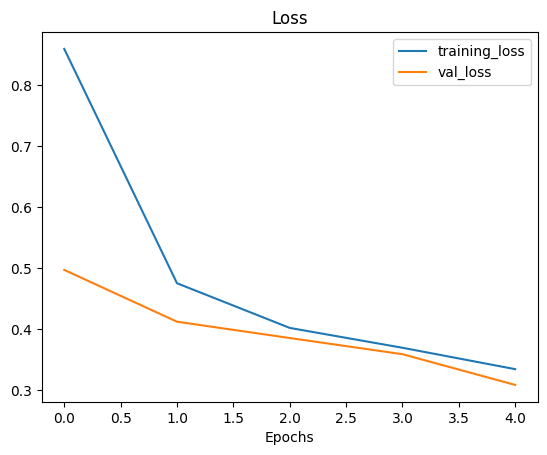

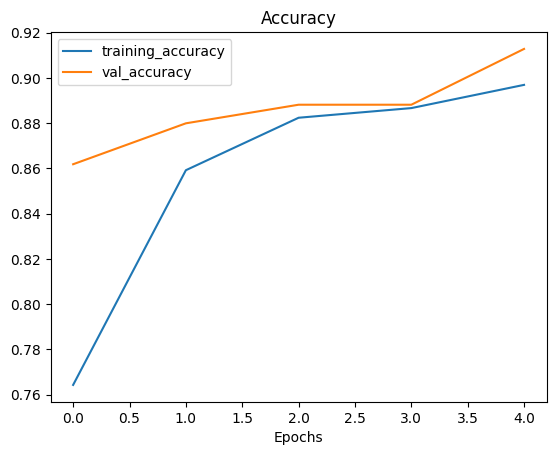

In [13]:
plot_loss_curves(history_0)

In [14]:
test_data.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [15]:
from helper_functions import pred_and_plot, load_and_prep_image

In [25]:

def pred_and_plot(model, filename, class_names, image_size=(224, 224)):
    """
    imports an image located at filename
    makes a prediction with model
    plots the image with the predicted class as the title
    """

    # import the target image and preprocess it
    img = load_and_prep_image(filename)

    # make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))
    # print(pred)

    # add in logic for multi-class and get pred_class name
    if len(pred[0]) > 1:
        pred_class = class_names[tf.argmax(pred[0])]
    else:
        pred_class = class_names[int(tf.round(pred))]


    # plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)
    plt.show()

In [16]:
! wget https://cdn.kronfagel.se/app/uploads/2023/06/21114255/7629_Kyckling_steak_ranch_1000x1000.jpg

--2024-01-29 19:16:24--  https://cdn.kronfagel.se/app/uploads/2023/06/21114255/7629_Kyckling_steak_ranch_1000x1000.jpg
Resolving cdn.kronfagel.se (cdn.kronfagel.se)... 13.224.50.102, 13.224.50.16, 13.224.50.56, ...
Connecting to cdn.kronfagel.se (cdn.kronfagel.se)|13.224.50.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 830996 (812K) [image/jpeg]
Saving to: ‘7629_Kyckling_steak_ranch_1000x1000.jpg’

7629_Kyckling_steak 100%[===================>] 811.52K   989KB/s    in 0.8s    

2024-01-29 19:16:26 (989 KB/s) - ‘7629_Kyckling_steak_ranch_1000x1000.jpg’ saved [830996/830996]



In [26]:

load_and_prep_image("/content/Kyckling.jpg",img_shape=224,scale=True)

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.1903958 , 0.24529776, 0.29627818],
        [0.1835937 , 0.23849566, 0.2880834 ],
        [0.18163069, 0.23653266, 0.2821034 ],
        ...,
        [0.10824512, 0.14777593, 0.16658008],
        [0.10677213, 0.14206626, 0.16951723],
        [0.10883396, 0.14594021, 0.16011162]],

       [[0.19470327, 0.24829616, 0.3032038 ],
        [0.1970614 , 0.25196335, 0.29698005],
        [0.19606285, 0.2509648 , 0.2950255 ],
        ...,
        [0.09990812, 0.14304537, 0.16170783],
        [0.10807995, 0.14337407, 0.17082505],
        [0.11129201, 0.14658614, 0.16619398]],

       [[0.19791296, 0.25037193, 0.30868125],
        [0.19846575, 0.25552776, 0.30006778],
        [0.18770903, 0.24261099, 0.2880942 ],
        ...,
        [0.10151576, 0.14465302, 0.16818243],
        [0.11042967, 0.15356693, 0.17709634],
        [0.10536262, 0.14849988, 0.17202929]],

       ...,

       [[0.20210959, 0.2698601 , 0.3006907 ],
        [0.20

1/1 [==============================] - 0s 26ms/step


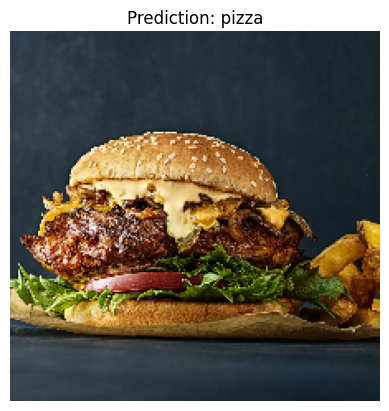

In [27]:
pred_and_plot(model_0, "/content/Kyckling.jpg", class_names=test_data.class_names)

In [20]:
! wget https://images.recept.se/images/articles/hemgjord-sushi-recept.jpg


--2024-01-29 19:17:56--  https://images.recept.se/images/articles/hemgjord-sushi-recept.jpg
Resolving images.recept.se (images.recept.se)... 146.75.94.208, 2a04:4e42:87::720
Connecting to images.recept.se (images.recept.se)|146.75.94.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 176989 (173K) [image/jpeg]
Saving to: ‘hemgjord-sushi-recept.jpg’

hemgjord-sushi-rece 100%[===================>] 172.84K  --.-KB/s    in 0.01s   

2024-01-29 19:17:57 (11.6 MB/s) - ‘hemgjord-sushi-recept.jpg’ saved [176989/176989]



In [28]:
load_and_prep_image("/content/sushi.jpg",img_shape=224,scale=True )

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.38285378, 0.26520672, 0.22599101],
        [0.36877623, 0.2514093 , 0.22003676],
        [0.33646768, 0.2581051 , 0.2227766 ],
        ...,
        [0.4007093 , 0.4007093 , 0.40855244],
        [0.40354773, 0.40354773, 0.40354773],
        [0.3778864 , 0.37396485, 0.3661217 ]],

       [[0.38647833, 0.2574605 , 0.22203507],
        [0.37175307, 0.25438613, 0.22301358],
        [0.348545  , 0.25834894, 0.22697642],
        ...,
        [0.4085243 , 0.41244587, 0.420289  ],
        [0.40814063, 0.40814063, 0.41572115],
        [0.42100805, 0.41329625, 0.4168239 ]],

       [[0.3743416 , 0.24492985, 0.20963573],
        [0.37114474, 0.25741923, 0.22604667],
        [0.3677402 , 0.26229554, 0.23484457],
        ...,
        [0.3898696 , 0.39379117, 0.4016343 ],
        [0.41050252, 0.41050252, 0.41834566],
        [0.428197  , 0.428197  , 0.43604013]],

       ...,

       [[0.45499808, 0.25955915, 0.18884705],
        [0.46

1/1 [==============================] - 0s 29ms/step


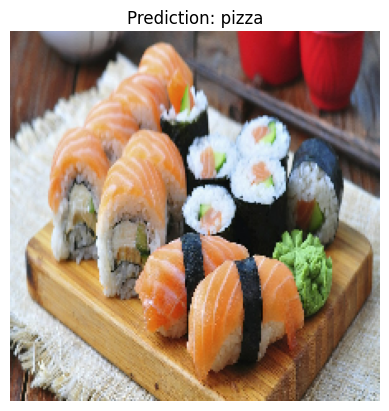

In [29]:
pred_and_plot(model_0,"/content/sushi.jpg", class_names=test_data.class_names)

In [ ]:
model_0.summary()

In [ ]:
print(model_0.layers[1])

In [ ]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

In [ ]:
base_model.summary()

In [ ]:
base_model.layers

In [ ]:
model_0.layers[1].layers

In [ ]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(base_model_1.layers):
  print(layer_number, layer.name, layer.trainable)

In [ ]:
base_model_1 = model_0.layers[1]

In [ ]:
print(base_model_1)

In [ ]:
print(len(base_model_1.trainable_variables))

In [ ]:
for layer_number, layer in enumerate(base_model_1.layers):
  print(layer_number, layer, layer.trainable)

In [ ]:
base_model_1.trainable = True
for layer in base_model_1.layers[:-20]:
  layer.trainable = False

model_0.compile(loss=tf.keras.losses.CategoricalCrossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])

In [ ]:
for layer_number, layer in enumerate(base_model_1.layers):
  print(layer_number, layer.name, layer.trainable)

In [ ]:
print(len(base_model_1.trainable_variables))

In [ ]:
final_epochs = 10

history_final_model = model_0(train_data_all,
                                   epochs= final_epochs,
                                   steps_per_epoch=len(train_data_all),
                                   validation_data=test_data,
                                   validation_steps=int(0.25 * len(test_data)),
                                   callbacks=[create_tensorboard_callback("My_model", "final test")])